# 中文文本分词

文本分类是人们日常工作中经常遇到的问题，也是机器学习和自然语言处理的重要研究内容。通常意义下的文本分类，实际上仅是符号化的标记（即自然数），并没有额外的过程性或说明性的知识，也没有元数据（如中图法分类号），只能从文档的内容本身提取信息来对文档进行分类。当然，对于特定的应用，使用外部知识或元数据可提高分类器的泛化能力。

那么，对于一个文本分类问题，我们一般采用如下流程进行处理：

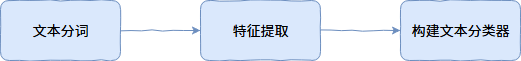

语言理解中，词是最小的能够独立活动的有意义的粒度。由词到句，由句成文。因此，文本分词一般都是自然语言处理的第一步。将句子分词之后，依旧无法进行分类，原因是机器并无法理解人类能使用的自然语言。所以，接下来就需要将词处理成能输入到算法中的向量，而不同的向量化和预处理方法也被统称为特征提取的过程。最后，基于文本特征建立机器学习分类模型，就能完成文本分类了。

中文分词这个概念自提出以来，经过多年的发展，主要可以分为三个方法：机械分词方法，统计分词方法，以及两种结合起来的分词。

其中，机械分词方法又叫做基于规则的分词方法。这种分词方法按照一定的规则将待处理的字符串与一个词表词典中的词进行逐一匹配，若在词典中找到某个字符串，则切分，否则不切分。机械分词方法按照匹配规则的方式，又可以分为：正向最大匹配法，逆向最大匹配法和双向匹配法三种。

**正向最大匹配法**


正向最大匹配法（Maximum Match Method，简称：MM）是指从左向右按最大原则与词典里面的词进行匹配。假设词典中最长词是  个字，那么从待切分文本的最左边取$m$个字符与词典进行匹配，如果匹配成功，则分词。如果匹配不成功，那么取$m-1$个字符与词典匹配，一直取直到成功匹配为止。

下来，我们用一个简单的例子来讲一下正向最大匹配法的过程。假设我们有如下所示的句子和字典。

- 句子：中华民族从此站起来了
- 词典：**中华，民族，从此，站起来了**

接下来，开始实施正向最大匹配法：

- 第一步：词典中最长是 4 个字，所以我们将 **中华民族** 取出来与词典进行匹配，匹配失败。
- 第二步：于是，去掉 **族**，以 **中华民** 进行匹配，匹配失败。
- 第三步：去掉 **中华民** 中的 **民**，以 **中华** 进行匹配，匹配成功。
- 第四步：在带切分句子中去掉匹配成功的词，待切分句子变成 **民族从此站起来了。**
- 第五步：重复上面的第 1-4 步骤
- 第六步：若最后一个词语匹配成功，结束。
- 最终句子被分成：**中华 / 民族 / 从此 / 站起来了。**

**逆向最大匹配法**

逆向最大匹配法（Reverse Maximum Match Method，简称：RMM）的原理与正向法基本相同，唯一不同的就是切分的方向与正向最大匹配法相反。逆向法从文本末端开始匹配，每次用末端的最长词长度个字符进行匹配。

因为基本原理与正向最大匹配法一样，反向来进行匹配就行。所以这里对算法不再赘述。由于汉语言存在偏正短语，因此逆向匹配法相比与正向匹配的精确度会高一些。

**双向最大匹配法**

双向最大匹配法（Bi-direction Matching Method，简称：BMM）则是将正向匹配法得到的分词结果与逆向匹配法得到的分词结果进行比较，然后按照最大匹配原则，选取次数切分最少的作为结果。

接下来，我们以正向最大匹配法为例来实现其分词过程。首先，给出示例句子和词典。

In [35]:
t = '我们是共产主义的接班人'
d = ('我们', '是', '共产主义', '的', '接班', '人', '你', '我', '社会', '主义')

In [36]:
def get_max_len(d):
    max_len_word = 0
    for key in d:
        if (len(key)>max_len_word):
            max_len_word = len(key)
    return max_len_word
get_max_len(d)


4

In [37]:
# 接下来，我们按照上方给出的正向最大匹配法伪代码来构建正向最大匹配分词函数。

def mm(t,d): # t应该是字符串,d应该是词典
    words = [] # 存放结果
    while len(t)>0: 
        word_len = get_max_len(d)
        for i in range(0,word_len): # 这里的i纯粹是用来计数的
            word = t[0:word_len]
            if word not in d:
                word_len-=1
                word = []
            else:
                t = t[word_len:] # 更新位置
                words.append(word)
                word = []
    return words



In [38]:
mm(t, d)  # 运行测试

['我们', '是', '共产主义', '的', '接班', '人']

可以看到，原句子以成功按照给出的字典进行了分词。

通过上面这段代码，虽然可以分词的目的，但也有明显的缺点。首先，这需要一个准备好的词典，而分词算法对于词典中不存在的词是无分辨能力的。其次，算法需要执行多个循环判断，时间复杂度高，不适用于大量文本分词。所以，更多情况下，我们会选择基于统计规则的中文分词方法。

随着语料库的大规模化，以及统计机器学习的蓬勃发展，基于统计规则的中文分词算法逐渐成为现在的主流分词方法。其特点是在给定大量已经分词的文本的前提下，利用统计机器学习模型学习词语切分的规律。

简单来讲，假设我们已经有一个由很多个文本组成的的语料库 D，现在需要对 **我有一个苹果** 进行分词。其中，两个相连的字 **苹** 和 **果** 在不同的文本中连续出现的次数越多，就说明这两个相连字很可能构成 **苹果**。

与此同时，**个** 和 **苹** 这两个相连的词在别的文本中连续出现的次数很少，就说明这两个相连的字不太可能构成 **个苹**。所以，可以利用统计规则来反应字与字成词的可信度。当字连续组合的概率高过一个临界值时，就认为该组合构成了一个词语。

基于统计的分词，一般情况下首先需要建立统计语言模型。然后再对句子进行单词划分，并对划分结果进行概率计算。最终，获得概率最大的分词方式。这里，我们一般会用到隐马可夫，条件随机场等方法。

**结巴中文分词**


**结巴中文分词** 就是一款基于统计的分词工具，其基于隐马可夫模型设计，并使用了 Viterbi 动态规划算法。由于结巴非常好用，分词效率很高，在中文分词领域有举足轻重的地位。

接下来，我们就来学习结巴分词的使用方法。结巴分词支持三种分词模式：

- 精确模式：试图将句子最精确地切开，适合文本分析。
- 全模式：把句子中所有的可以成词的词语都扫描出来，速度非常快，但是不能解决歧义。
- 搜索引擎模式：在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
结巴的使用方法非常简单，cut 方法默认为精确模式，并对文本进行分词。

In [39]:
import jieba

seg = "蓝桥云课楼 + 深度学习实战是一门培养机器学习初级工程师的课程"
seg_list = jieba.cut(seg)
# seg_list
# print(type(seg_list))
word2idx = {word:idx for word,idx in enumerate(seg_list)}
# print(word2idx)
# seq = [word2idx.get(word, 0) for word in seg_list]  # 使用get方法获取索引，不存在的词使用0表示
# seq
for word in seg_list:
    print(word)
# jieba 返回的迭代器只能迭代一次哦

In [40]:
%%time
print(" ".join('1'))
", ".join(seg_list)

1
CPU times: total: 0 ns
Wall time: 510 µs


''

In [41]:
%%time
", ".join(jieba.cut(seg, cut_all=True))

CPU times: total: 0 ns
Wall time: 1 ms


'蓝桥, 云, 课, 楼, ,  , , +, ,  , , 深度, 学习, 实战, 是, 一门, 培养, 机器, 学习, 初级, 初级工, 工程, 工程师, 的, 课程'

In [42]:
%%time
", ".join(jieba.cut_for_search(seg))

CPU times: total: 0 ns
Wall time: 0 ns


'蓝桥, 云, 课楼,  , +,  , 深度, 学习, 实战, 是, 一门, 培养, 机器, 学习, 初级, 工程, 工程师, 的, 课程'

你可以对比三种模式的分词区别。这里，我们通过 %%time Jupyter Notebook 魔术方法打印出三段代码执行的时长，全模式的确速度最快。

对于上面的示例语句，实际上这里的「机器学习」应该被看作一个专有名词，而不应该被分为一般情形下的「机器」和「学习」。结巴分词支持自定义词典，从而可以避免上面这类情况。

如果只需要添加零星的几个自定义词汇，可以直接使用 jieba.add_word。当然，如果生产环境需要识别大量的专业词汇，可以参考  官方示例 制作用户词典。

# 英文文本分词

相比于中文文本，英文文本分词要简单很多。原因在于，英文文本词与词之间本来就有空格或者标点符号进行分割。所以，英文文本分词不需要依靠算法或暴力拆分，直接通过空格或者标点来将文本进行分开就可以完成。

In [43]:
'i have a pen'.split()  # split 方法默认将字符串按空格拆分

['i', 'have', 'a', 'pen']

当然，对于日常的英文文本分词，我们可以采用下面的代码。例如，string.punctuation 提供了常用英文标点符号。

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

接下来，删除句子中的标点符号。这里，可以使用 Python 提供了一个名为 translate()  的函数，它可以将一组字符映射到另一组字符。我们可以使用函数 maketrans()  来创建映射表。我们可以创建一个空的映射表，maketrans() 函数的第三个参数允许我们列出在 translate 过程中要删除的所有字符。代码如下

In [45]:
text = """
[English] is a West Germanic language that was first spoken in early
medieval England and eventually became a global lingua franca.
It is named after the <Angles>, one of the Germanic tribes that
migrated to the area of Great Britain that later took their name,
as England.
"""

In [46]:
words = text.split()
table = str.maketrans('','',string.punctuation)

stripped = [w.translate(table) for w in words]
print(stripped)

['English', 'is', 'a', 'West', 'Germanic', 'language', 'that', 'was', 'first', 'spoken', 'in', 'early', 'medieval', 'England', 'and', 'eventually', 'became', 'a', 'global', 'lingua', 'franca', 'It', 'is', 'named', 'after', 'the', 'Angles', 'one', 'of', 'the', 'Germanic', 'tribes', 'that', 'migrated', 'to', 'the', 'area', 'of', 'Great', 'Britain', 'that', 'later', 'took', 'their', 'name', 'as', 'England']


# 文本特征提取


分词之后的语料数据是无法直接用于分类的，还需要我们从中提取特征，并将这些文本特征变换为数值特征。只有向量化后的数值才能够传入到分类器中训练文本分类模型。

文本特征提取的方法有很多，这里我们介绍比较有代表性，同时较为常用的几个。



**词袋模型**

 词袋模型（英语：Bag-of-words model，简称：BoW）是最最基础的一类特征提取方法，其主要思路是忽略掉了文本的语法和语序，用一组无序的单词序列来表达一段文字或者一个文档。可以这样理解，我们把整个文档集的所有出现的词都丢进袋子里面，去重后无序排列。这样，就可以按照词语出现的次数来表示文档。

下面，我们来演示词袋模型的步骤。对于如下图所示的 3 个英文句子（中文同理）。



**"The elephant sneezed at the sight of potatoes."**   
**"Bats can see via echolocation. See the bat sight sneeze!"**   
**"Wondering, she opened the door to the studio."**

首先，完成分词 → 去除多余标点字符 → 去除重复，得到如下图横排的单词，即为词袋。英文中，单复数，时态往往只保留单词原型。

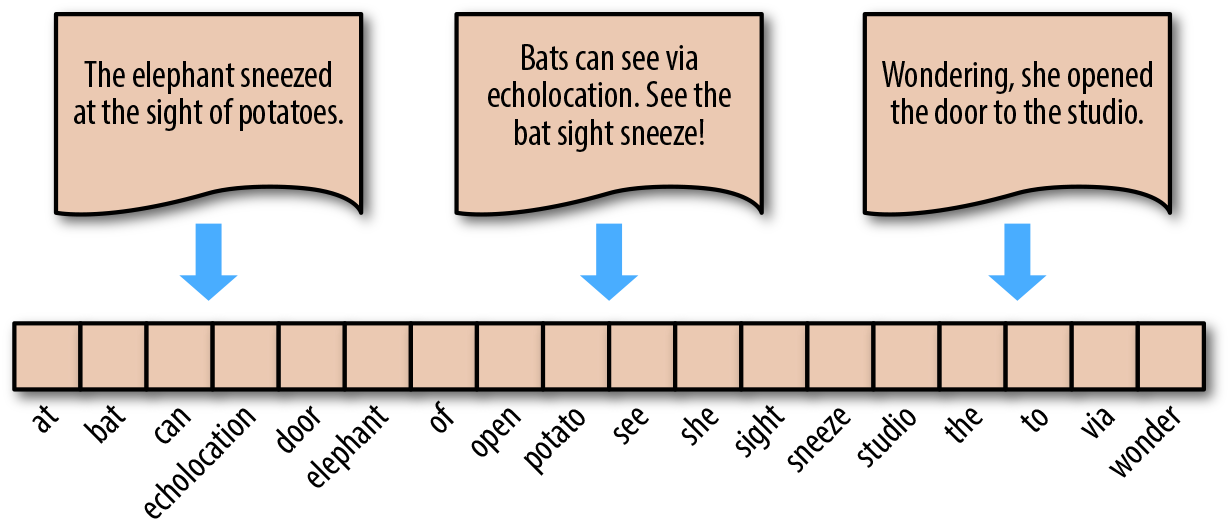

词袋模型的表示方法为，对照词袋，统计原句子中某个单词出现的次数。这样，无论句子的长度如何，均可用等长度的词袋向量进行表示。例如，对于句子 "Bats can see via echolocation. See the bat sight sneeze!"，其可以转换为向量$[0,2,1,...,0,1,0]。$

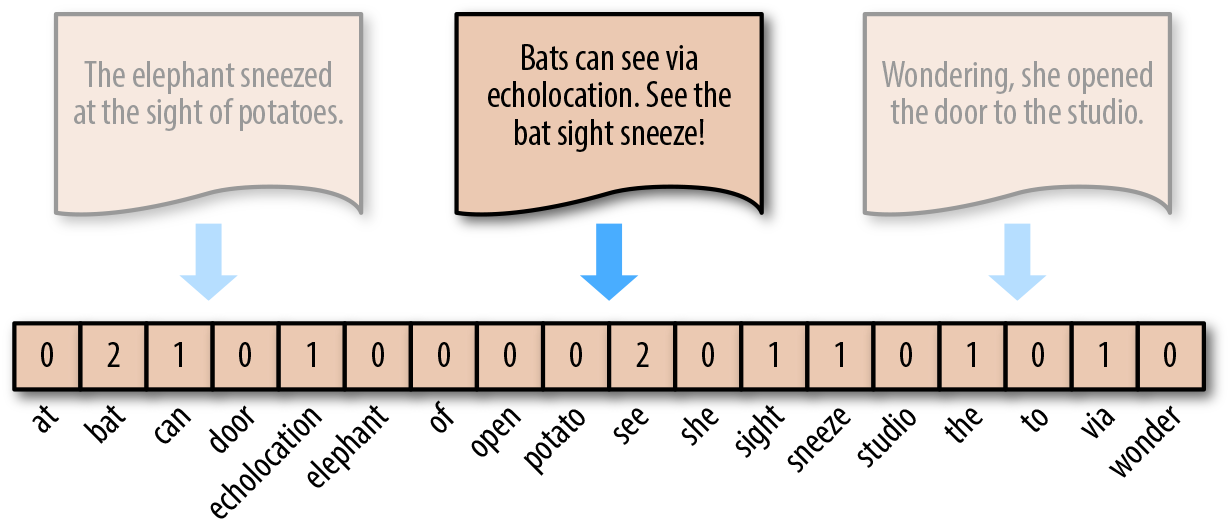

我们可以使用 scikit-learn 提供的 sklearn.feature_extraction.text.CountVectorizer  来构建词袋模型。方法很简单，通过下面的例子就能看明白了。

In [47]:
from sklearn .feature_extraction.text import CountVectorizer

corpus = [
    "The elephant sneeze at the sight of potato.",
    "Bat can see via echolocation. See the bat sight sneeze!",
    "Wonder, she open the door to the studio.",
]
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())

vectors.toarray()

['at' 'bat' 'can' 'door' 'echolocation' 'elephant' 'of' 'open' 'potato'
 'see' 'she' 'sight' 'sneeze' 'studio' 'the' 'to' 'via' 'wonder']


array([[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0],
       [0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1]],
      dtype=int64)

上面的例子中，我们在制作 corpus 时已手动对英语单词中单复数和时态词汇做了处理，全部变为原型。这个过程在实际应用时，可以通过预处理代码来完成。

词袋模型的另一个小变种就是不以单词实际出现的次数表示，而是采取类似独热编码的方式。单词出现即置为 1，未出现即为 0。

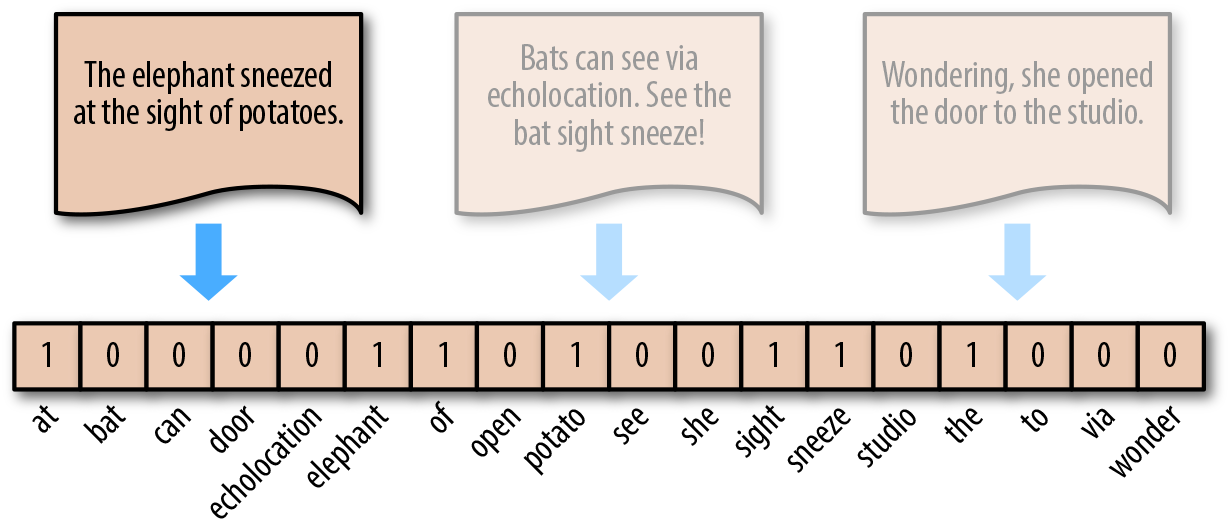

这个过程同样可以使用 scikit-learn 来完成。这里用到了 sklearn.preprocessing.Binarizer  对上面 CountVectorizer 处理结果进行独热编码转换。

In [48]:
from sklearn.preprocessing import Binarizer

from sklearn.preprocessing import Binarizer
freq = CountVectorizer()
corpus_ = freq.fit_transform(corpus)

onehot = Binarizer()
onehot.fit_transform(corpus_.toarray())


array([[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]],
      dtype=int64)

**TF-IDF 模型**

TF-IDF 模型（英语：Term frequency–inverse document frequency）是一种用于信息检索与文本挖掘的常用加权技术。TF-IDF 是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。
TF-IDF 由 TF（Term frequency，词频）和 IDF（Inverse document frequency，逆文档频率）两部分组成。计算公式为：

$$
tf_{ij} = \frac{n_{ij}}{\sum_k n_{kj}}
$$

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
tfidf.toarray()

array([[0.39066946, 0.        , 0.        , 0.        , 0.        ,
        0.39066946, 0.39066946, 0.        , 0.39066946, 0.        ,
        0.        , 0.29711419, 0.29711419, 0.        , 0.46147135,
        0.        , 0.        , 0.        ],
       [0.        , 0.56555816, 0.28277908, 0.        , 0.28277908,
        0.        , 0.        , 0.        , 0.        , 0.56555816,
        0.        , 0.21506078, 0.21506078, 0.        , 0.16701388,
        0.        , 0.28277908, 0.        ],
       [0.        , 0.        , 0.        , 0.36772387, 0.        ,
        0.        , 0.        , 0.36772387, 0.        , 0.        ,
        0.36772387, 0.        , 0.        , 0.36772387, 0.43436728,
        0.36772387, 0.        , 0.36772387]])

In [60]:
tex = '常国龙是我男神'
words = jieba.cut(text)
# 先遍历吧
l = {word:idx for idx,word in enumerate(words)}
print(l)
s = " ".join(words)
print(s)

{'常国龙': 0, '是': 1, '我': 2, '的': 3, '男神': 4}



**Word2Vec 模型**

 Word2Vec 模型 是 Google 团队于 2015 年提出来的一种字词的向量表示法，又被称为「词嵌入」。

无论是词袋模型，还是 TF-IDF 模型，它们均是使用离散化的向量值来表示文本。这些编码是任意的，并未提供有关字词之间可能存在的相关性。将字词表示为唯一的离散值还会导致数据稀疏性，并且通常意味着我们可能需要更多数据才能成功训练统计模型。

向量空间模型 在连续向量空间中表示（嵌入）字词，其中语义相似的字词会映射到附近的点（在彼此附近嵌入）。向量空间模型在 NLP 方面有着悠久而丰富的历史，但所有方法均以某种方式依赖于分布假设，这种假设指明在相同上下文中显示的字词语义相同。

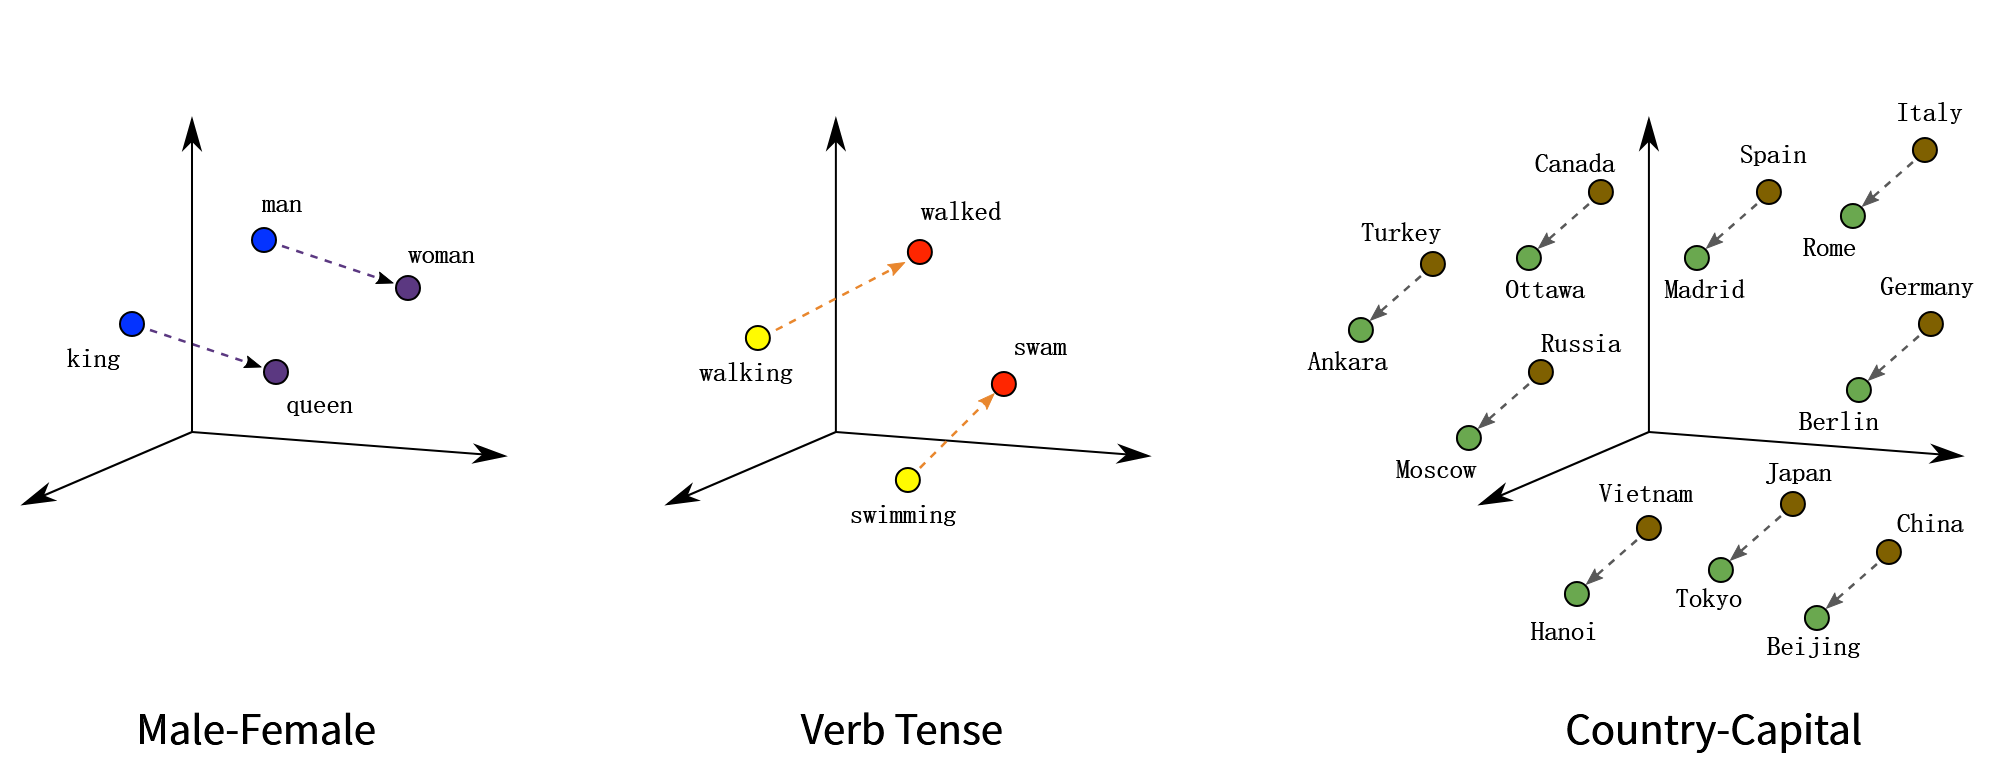

Word2Vec 是一种计算效率特别高的预测模型，用于学习原始文本中的字词嵌入。它分为两种类型：连续词袋模型（CBOW）和 Skip-Gram 模型。从算法上看，两种模型比较相似，只是 CBOW 从源上下文字词（the cat sits on the）中预测目标字词（例如 mat），而 Skip-Gram 则逆向而行，从目标字词中预测源上下文字词。

根据论文观点，统计学上有助于 CBOW 整理很多分布信息。在大多数情况下，这对于小型数据集来说是很有用的。但是，Skip-Gram 将每个上下文 - 目标对视为一个新的观察对象，当我们使用大型数据集时，Skip-Gram 似乎能发挥更好的效果。关于 Word2Vec 的具体原理解释比较复杂，大家可以阅读  论文原文 或  其他相关资料。本次实验，我们重点来学习如何使用 Word2Vec。

Word2Vec 词嵌入过程一般常用  Gensim 库来处理。Gensim 是自然语言处理过程中一个比较常用的工具，其提供了封装好的高效 Word2Vec 处理类 gensim.modelsWord2Vec()。其常用参数有：

- size: 词嵌入的维数，表示每个单词嵌入后的向量长度。
- window: 目标字与目标字周围的字之间的最大距离。
- min_count: 训练模型时要考虑的最小字数，出现小于此计数的单词将被忽略。
- sg: 训练算法，CBOW(0) 或 Skip-Gram(1)

In [16]:
# 使用 Word2Vec 对前面的示例文本进行词嵌入操作。
from gensim.models import Word2Vec
# 分词之后的示例文本
sentences = [['the', 'elephant', 'sneeze', 'at', 'the', 'sight', 'of', 'potato'],
             ['bat', 'can', 'see', 'via', 'echolocation', 'see', 'the', 'bat', 'sight', 'sneeze'],
             ['wonder', 'she', 'open', 'the', 'door', 'to', 'the', 'studio']]

# 训练

model = Word2Vec(sentences,vector_size=20,min_count=1)
# 输出该语料库独立不重复词
print(list(model.wv.index_to_key))
model.wv['elephant']



['the', 'bat', 'sneeze', 'sight', 'see', 'elephant', 'at', 'of', 'potato', 'studio', 'to', 'via', 'echolocation', 'wonder', 'she', 'open', 'door', 'can']


array([-0.04309844,  0.01832869,  0.02594942,  0.02870969,  0.03733459,
       -0.03083838,  0.00552807,  0.03023641, -0.01420025, -0.03086761,
       -0.00205112, -0.04184474, -0.02800006,  0.03552269,  0.0167627 ,
        0.03612835,  0.03400124,  0.03765371, -0.01894577, -0.00280903],
      dtype=float32)

下面，我们可以把 Word2Vec 嵌入后的词在空间中绘制处理。由于上面模型设置了 size=20，所以需要使用 PCA 降维把嵌入后的向量降维为二维才能够在平面中可视化出来。

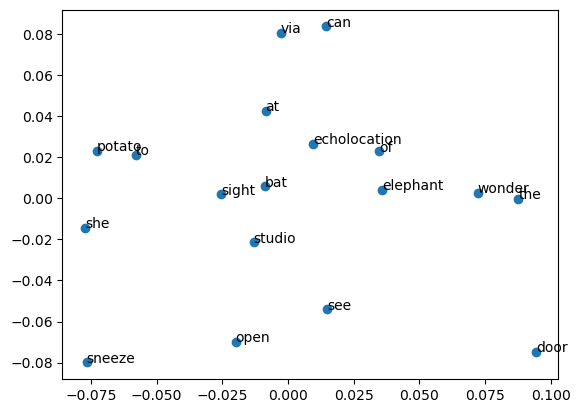

In [17]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

# PCA降维
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

由于我们的语料库较小，其实字词直接的相关性不太明显。如果语料库足够大，你就可以明显看出部分意义相关的词空间距离更近。

训练 Word2Vec 模型往往需要大量的语料和时间，所以在有些时候我们会使用预训练的词嵌入模型。例如，Google 在  Word2Vec Project 上发布了一个预先训练过的 Word2Vec 模型。该模型使用谷歌新闻数据（约 1000 亿字）进行训练，其包含了 300 万个单词和短语，并且使用 300 维词向量表示。由于该预训练词嵌入模型大小为 3.4 GB，这里就不再演示了。你可以在  本地下载 下来，并通过以下代码加载模型。

# 假新闻分类任务


WSDM - Fake News Classification 假新闻分类大赛是 Kaggle 上面的一个比赛。本次实验我们使用其提供的数据集来完成一次文本分类任务。首先，下载实验提供的数据集。

In [18]:
!wget -nc "http://labfile.oss.aliyuncs.com/courses/1233/wsdm_mini.csv"

File 'wsdm_mini.csv' already there; not retrieving.



In [19]:
import pandas as pd

df = pd.read_csv('wsdm_mini.csv')
df

,title1_zh,title2_zh,label
0,千叶湖八岁孩子不想去学英语，跳楼了,「辟谣」千叶湖八岁孩子跳楼了为谣言信息,disagreed
1,喝酸奶真的能补充益生菌吗？,喝酸奶来补充益生菌，靠谱么？,agreed
2,刚刚马云终于出手了！房价要跌，扬言房地产中介都要失业了,最新消息马云终于出手了！扬言房地产中介都要失业！6,agreed
3,直击“冯乡长”李正春追悼会：赵本山全程操办，赵四刘能现场祭奠,昆明会议直击“活摘”谣言,unrelated
4,李雨桐爆薛之谦离婚内幕，说到底就是网红之间的恩怨情仇嘛,薛之谦前女友李雨桐再次发微博爆料，薛之谦工作室发声明辟谣,disagreed
...,...,...,...
14995,脸上长了斑点不要急，教你2个祛斑的小妙招，让肌肤更显细腻白皙,脸上“老年斑”，睡前轻轻脸上抹一次，7天斑点不见了,agreed
14996,提高免疫力✌️,保健品能提高免疫力吗？,unrelated
14997,紧急寻找两位丢失身份证和高考准考证的学生,「辟谣」临近高考，“刘明炜”丢失准考证的谣言又开始刷屏了,disagreed
14998,《跑男》天津录制“霸占”学生图书馆！大学生怒了：滚出我们校园！,天大学生让跑男滚出天津是谣言？一切都是无良媒体的恶意炒作？！,disagreed


该数据集使用了原比赛提供的训练集，仅保留了中文字段并抽样其中 1.5 万条数据。数据集包含两列特征 title1_zh 和 title2_zh，这是两个新闻标题。而目标值 label 则表示这两则新闻的关系，其中：

- agreed：B 谈到与 A 相同的假新闻。
- disagreed：B 驳斥 A 中的假新闻。
- unrelated：B 与 A 无关。

3 个标签的数据各有 5000 条。
按照上文中的思路，首先我们需要对文本进行分词处理。在分词之前，首先将 title1_zh 和 title2_zh 合并为一个字段 title_zh


In [20]:
df['title_zh'] = df[['title1_zh','title2_zh']].apply(lambda x:"".join(x),axis = 1)

df_merge = df.drop(df.columns[[0,1]],axis = 1)  # 删除第0列到第一列

df_merge

,label,title_zh
0,disagreed,千叶湖八岁孩子不想去学英语，跳楼了「辟谣」千叶湖八岁孩子跳楼了为谣言信息
1,agreed,喝酸奶真的能补充益生菌吗？喝酸奶来补充益生菌，靠谱么？
2,agreed,刚刚马云终于出手了！房价要跌，扬言房地产中介都要失业了最新消息马云终于出手了！扬言房地产中介...
3,unrelated,直击“冯乡长”李正春追悼会：赵本山全程操办，赵四刘能现场祭奠昆明会议直击“活摘”谣言
4,disagreed,李雨桐爆薛之谦离婚内幕，说到底就是网红之间的恩怨情仇嘛薛之谦前女友李雨桐再次发微博爆料，薛之...
...,...,...
14995,agreed,脸上长了斑点不要急，教你2个祛斑的小妙招，让肌肤更显细腻白皙脸上“老年斑”，睡前轻轻脸上抹一...
14996,unrelated,提高免疫力✌️保健品能提高免疫力吗？
14997,disagreed,紧急寻找两位丢失身份证和高考准考证的学生「辟谣」临近高考，“刘明炜”丢失准考证的谣言又开始刷屏了
14998,disagreed,《跑男》天津录制“霸占”学生图书馆！大学生怒了：滚出我们校园！天大学生让跑男滚出天津是谣言？...


接下来，对 title_zh 执行分词操作。分词过程中另一个比较重要的步骤是「删除停用词」。通常意义上， 停用词 大致分为两类。一类是人类语言中包含的功能词，这些功能词极其普遍，与其他词相比，功能词没有什么实际含义，比如英文中的 the、is、at、which、on，以及中文中的 的、得 等。另一类词包括词汇词，比如大规模语料中的高频词，很多高频词只能带来非常少量的语义信息。删除停用词可以提高后续文本特征提取和分类的性能

In [21]:
!wget -nc "http://labfile.oss.aliyuncs.com/courses/1176/stopwords.txt" # 停用词词典

File 'stopwords.txt' already there; not retrieving.

http://#: Invalid host name.
--2025-04-16 12:43:00--  http://xn--eyqw0ar44fs6sa/
Resolving xn--eyqw0ar44fs6sa (xn--eyqw0ar44fs6sa)... failed: ��֪�������������� .
wget: unable to resolve host address 'xn--eyqw0ar44fs6sa'


In [22]:
# 定义一个函数来加载停用词文件中的数据。

def load_stopwords(file_path):
    with open(file_path,'r') as f:
        stopwords = [line.strip('\n') for line in f.readlines()]
    return stopwords
stopwords = load_stopwords('stopwords.txt')

stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.数',
 '.日',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '\u3000',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '【',
 '】',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一.',
 '一一',
 '一下',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一则通过',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一时',
 '一来',
 '一样',
 '一次',
 '一片',
 '一番',
 '一直',
 '一致',
 '一般',
 '一起',


In [23]:
# 分词和删除停用词

from tqdm import tqdm
import jieba
corpus = []
for line in tqdm(df['title_zh']):
    words = []
    seg_list = list(jieba.cut(line))
    for word in seg_list:
        if word in stopwords:
            continue
        words.append(word)
        corpus.append(words)

100%|██████████| 15000/15000 [00:11<00:00, 1338.36it/s]


接下来，我们对词语进行 Word2Vec 嵌入，同时将每条数据各单词的向量相加，作为该句子最终的向量表示。

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = df.label.shape
print(X.shape,Y)
# X_train, X_test, y_train, y_test = train_test_split(X, df.label, test_size=0.2)
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

(263769, 100) (15000,)
